In [ ]:
# No installation needed as Colab already has these
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
import pandas as pd

# Load the dataset from Our World in Data
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)

# Display a sample of countries to confirm availability
print("Available countries sample:", df['country'].dropna().unique()[:15])

# Preview the first few rows
df.head()


Available countries sample: ['Afghanistan' 'Africa' 'Africa (GCP)' 'Albania' 'Algeria' 'Andorra'
 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Asia' 'Asia (GCP)']


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Reload the dataset from working source
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)

# Check successful load
print("Dataset loaded. Available countries sample:", df['country'].unique()[:15])



Dataset loaded. Available countries sample: ['Afghanistan' 'Africa' 'Africa (GCP)' 'Albania' 'Algeria' 'Andorra'
 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Asia' 'Asia (GCP)']


In [ ]:
# Filter for Kenya
kenya_data = df[df['country'] == 'Kenya']

# Keep only necessary columns and drop missing values
kenya_data = kenya_data[['year', 'gdp', 'co2']].dropna()

# Preview the filtered data
kenya_data.head()


,year,gdp,co2
24185,1950,6.353789e+09,0.909
24186,1951,7.729594e+09,1.392
24187,1952,6.871281e+09,1.590
24188,1953,6.706084e+09,1.513
24189,1954,7.485814e+09,1.700


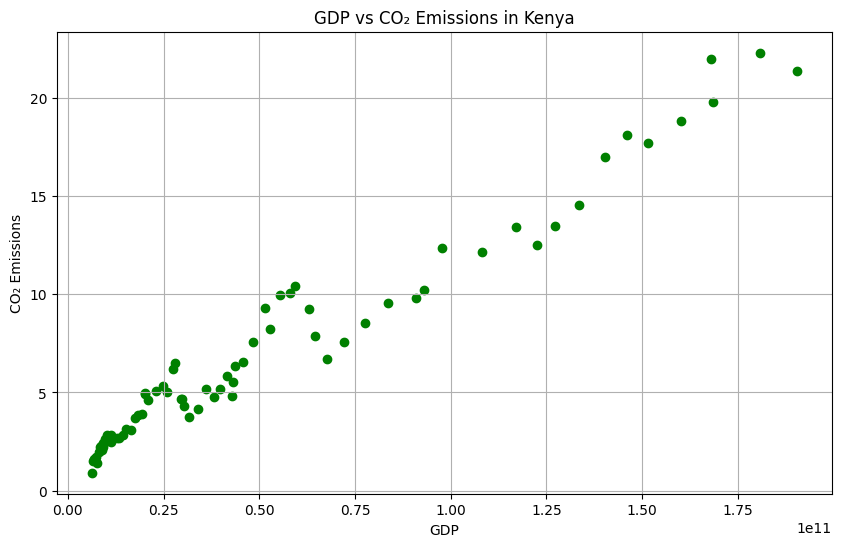

In [ ]:
import matplotlib.pyplot as plt

# Plot GDP vs CO2 emissions
plt.figure(figsize=(10, 6))
plt.scatter(kenya_data['gdp'], kenya_data['co2'], color='green')
plt.title('GDP vs CO₂ Emissions in Kenya')
plt.xlabel('GDP')
plt.ylabel('CO₂ Emissions')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data
X = kenya_data[['gdp']]
y = kenya_data['co2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 0.93
R² Score: 0.97


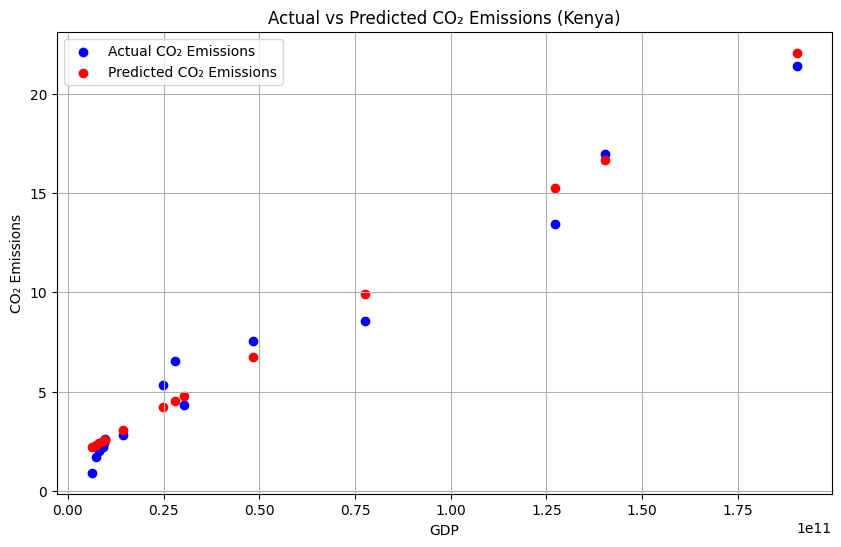

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted CO2 emissions
plt.figure(figsize=(10, 6))
plt.scatter(X_test['gdp'], y_test, color='blue', label='Actual CO₂ Emissions')
plt.scatter(X_test['gdp'], y_pred, color='red', label='Predicted CO₂ Emissions')
plt.xlabel('GDP')
plt.ylabel('CO₂ Emissions')
plt.title('Actual vs Predicted CO₂ Emissions (Kenya)')
plt.legend()
plt.grid(True)
plt.show()
